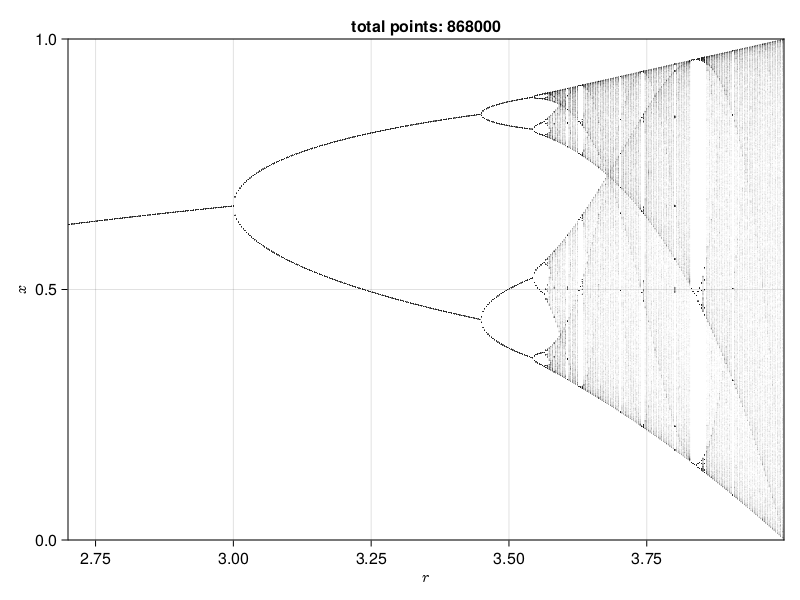

In [4]:
# Example taken from https://juliadynamics.github.io/DynamicalSystems.jl/latest/chaos/orbitdiagram/
using DynamicalSystems, CairoMakie

ds = Systems.logistic()
i = 1
pvalues = 2.7:0.003:4
ics = [rand() for m in 1:10]
n = 2000
Ttr = 2000
p_index = 1
output = orbitdiagram(ds, i, p_index, pvalues; n = n, Ttr = Ttr)

L = length(pvalues)
x = Vector{Float64}(undef, n*L)
y = copy(x)
for j in 1:L
    x[(1 + (j-1)*n):j*n] .= pvalues[j]
    y[(1 + (j-1)*n):j*n] .= output[j]
end

fig, ax = scatter(x, y; axis = (xlabel = L"r", ylabel = L"x"),
    markersize = 0.8, color = ("black", 0.05),
)
ax.title = "total points: $(L*n)"
xlims!(ax, pvalues[1], pvalues[end]); ylims!(ax,0,1)
fig